# 타이타닉 생존자 예측

## data laod

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


--------------Columns-----------------

- Passengerid : 탑승자 데이터 일련번호
- survived : 생존여부, 0=사망 1=생존
- pclass : 선실 등급, 1=일등석 2=이등석 3= 삼등석
- sex : 성별
- name : 이름
- Age : 탑승자 나이
- sibsp : 같이 탑승한 형제자매 또는 배우자 인원
- parch : 같이 탑승한 부모님 또는 어린이 인원
- ticket : 티켓번호
- cabin : 선실 번호
- embarked : 중간 정착 항구 C=Cherbourg, Q= Qeenstown , S=Southampton

## Null 값 처리

In [2]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [4]:
print(titanic_df.Sex.value_counts())
print('\n',titanic_df.Cabin.value_counts())
print('\n',titanic_df.Embarked.value_counts())

male      577
female    314
Name: Sex, dtype: int64

 N              687
B96 B98          4
C23 C25 C27      4
G6               4
C22 C26          3
              ... 
C148             1
C46              1
E10              1
D30              1
E46              1
Name: Cabin, Length: 148, dtype: int64

 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [5]:
# Cabin 앞글자만 추출
titanic_df['Cabin']=titanic_df['Cabin'].str[0]
titanic_df.Cabin.head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

성별에 따른 생존자 : Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

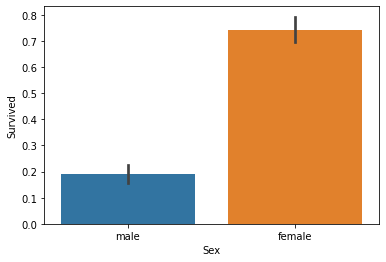

In [6]:
## 성별 별 생존자 분석
print('성별에 따른 생존자 :',titanic_df.groupby(['Sex','Survived'])['Survived'].count())
sns.barplot(x='Sex',y='Survived',data=titanic_df)

------객실 등급별 성별에 따른 생존자 시각화------


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

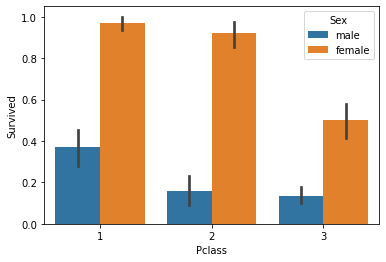

In [7]:
print('------객실 등급별 성별에 따른 생존자 시각화------')
sns.barplot(x='Pclass', y='Survived', hue='Sex',data=titanic_df)

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

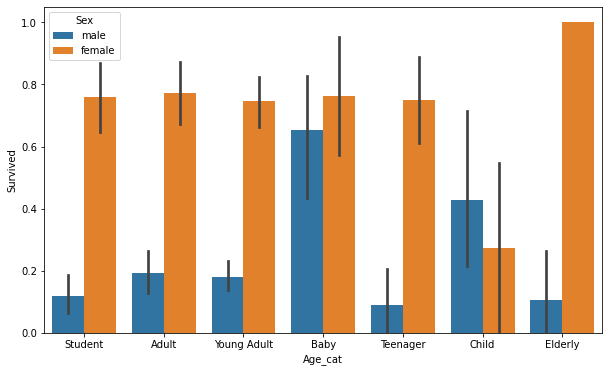

In [8]:
## Age => category 로 변경

def get_category(age):
    cat =''
    if age <= -1 : cat='Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프 크기
plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult']

# lambda 식에 위에서 생성한 get_category() 함수 반환값 지정
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_category(x)) 

# get_category(x)입력값으로 'Age'컬럼값을 받아서 해당 cat에 반환
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df)


여자Child 의 경우에 다른 연령 보다 생존확률이 낮았고, 여자Elderly 의 경우에 다른 연령대에 비해
생존확률이 매우 높았습니다. Sex, Age, Pclass 는 생존률에 중요한 feature임을 알수 있습니다.

In [9]:
titanic_df.drop('Age_cat', axis=1, inplace=True)
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S


## Encoding

- LabelEncoding을 통해 Cabin, Sex, Embarked의 문자형 카테고리 피처를 숫자형 카테고리로 변환

In [13]:
from sklearn.preprocessing import LabelEncoder

def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder = encoder.fit(df[feature])
        df[feature] = encoder.transform(df[feature])
        
    return df

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3
